In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv(
    "../../Data/adult_income_sample.csv", delimiter=","
)

In [4]:
# Cleaning
df['sex_encoded'] = df['sex'].map({'Male': 1, 'Female': 0})
df['workclass_encoded'] = df['workclass'].map({'Private': 1, 'Gov': 0, 'Self-emp':2})
df['label_encoded'] = df['label'].map({'<=50K': 0, '>50K': 1})
df['education_encoded'] = df["education"].map({
    '11th': 0,
    'HS-grad': 1,
    'Some-college': 2,
    'Assoc': 3,
    'Bachelors': 4,
    'Masters': 5
})

In [5]:
# Create an interaction feature: workclass_encoded * education_encoded
df['workclass_education_interaction'] = df['workclass_encoded'] * df['education_encoded']
df = df.drop(columns=['workclass_encoded', 'education_encoded'])

df["hours_per_week_squared"] = df["hours_per_week"] ** 2
df = df.drop(columns=["hours_per_week"])

                                      age    fnlwgt  sex_encoded  \
age                              1.000000 -0.024676     0.026231   
fnlwgt                          -0.024676  1.000000    -0.035513   
sex_encoded                      0.026231 -0.035513     1.000000   
label_encoded                    0.008057  0.024603    -0.005654   
workclass_education_interaction  0.003067  0.032592     0.034531   
hours_per_week_squared           0.038048 -0.019737     0.042445   

                                 label_encoded  \
age                                   0.008057   
fnlwgt                                0.024603   
sex_encoded                          -0.005654   
label_encoded                         1.000000   
workclass_education_interaction       0.019841   
hours_per_week_squared                0.016012   

                                 workclass_education_interaction  \
age                                                     0.003067   
fnlwgt                              

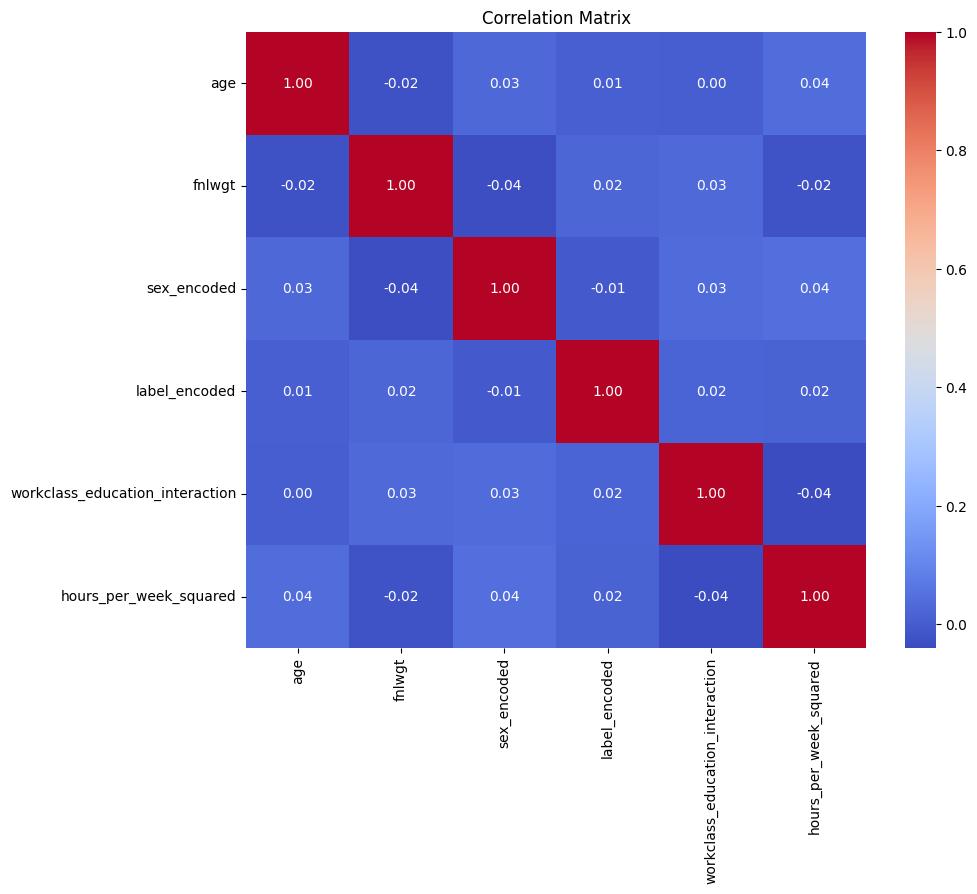

In [6]:
# Correlation matrix for numerical columns
df.dropna(inplace=True)


df = df.drop(columns=["sex", "workclass", "education", "label"])
corr_matrix = df.corr()
print(corr_matrix)
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [7]:
# List pairs of features with high correlation (>|0.8|)
threshold = 0.04
corr_matrix = df.corr().abs()
high_corr_pairs = []
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and corr_matrix.loc[i, j] > threshold:
            high_corr_pairs.append((i, j, corr_matrix.loc[i, j]))

if high_corr_pairs:
    print("Highly correlated feature pairs (>|0.08|):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")
else:
    print("No highly correlated feature pairs found.")

Highly correlated feature pairs (>|0.08|):
sex_encoded & hours_per_week_squared: 0.04
hours_per_week_squared & sex_encoded: 0.04


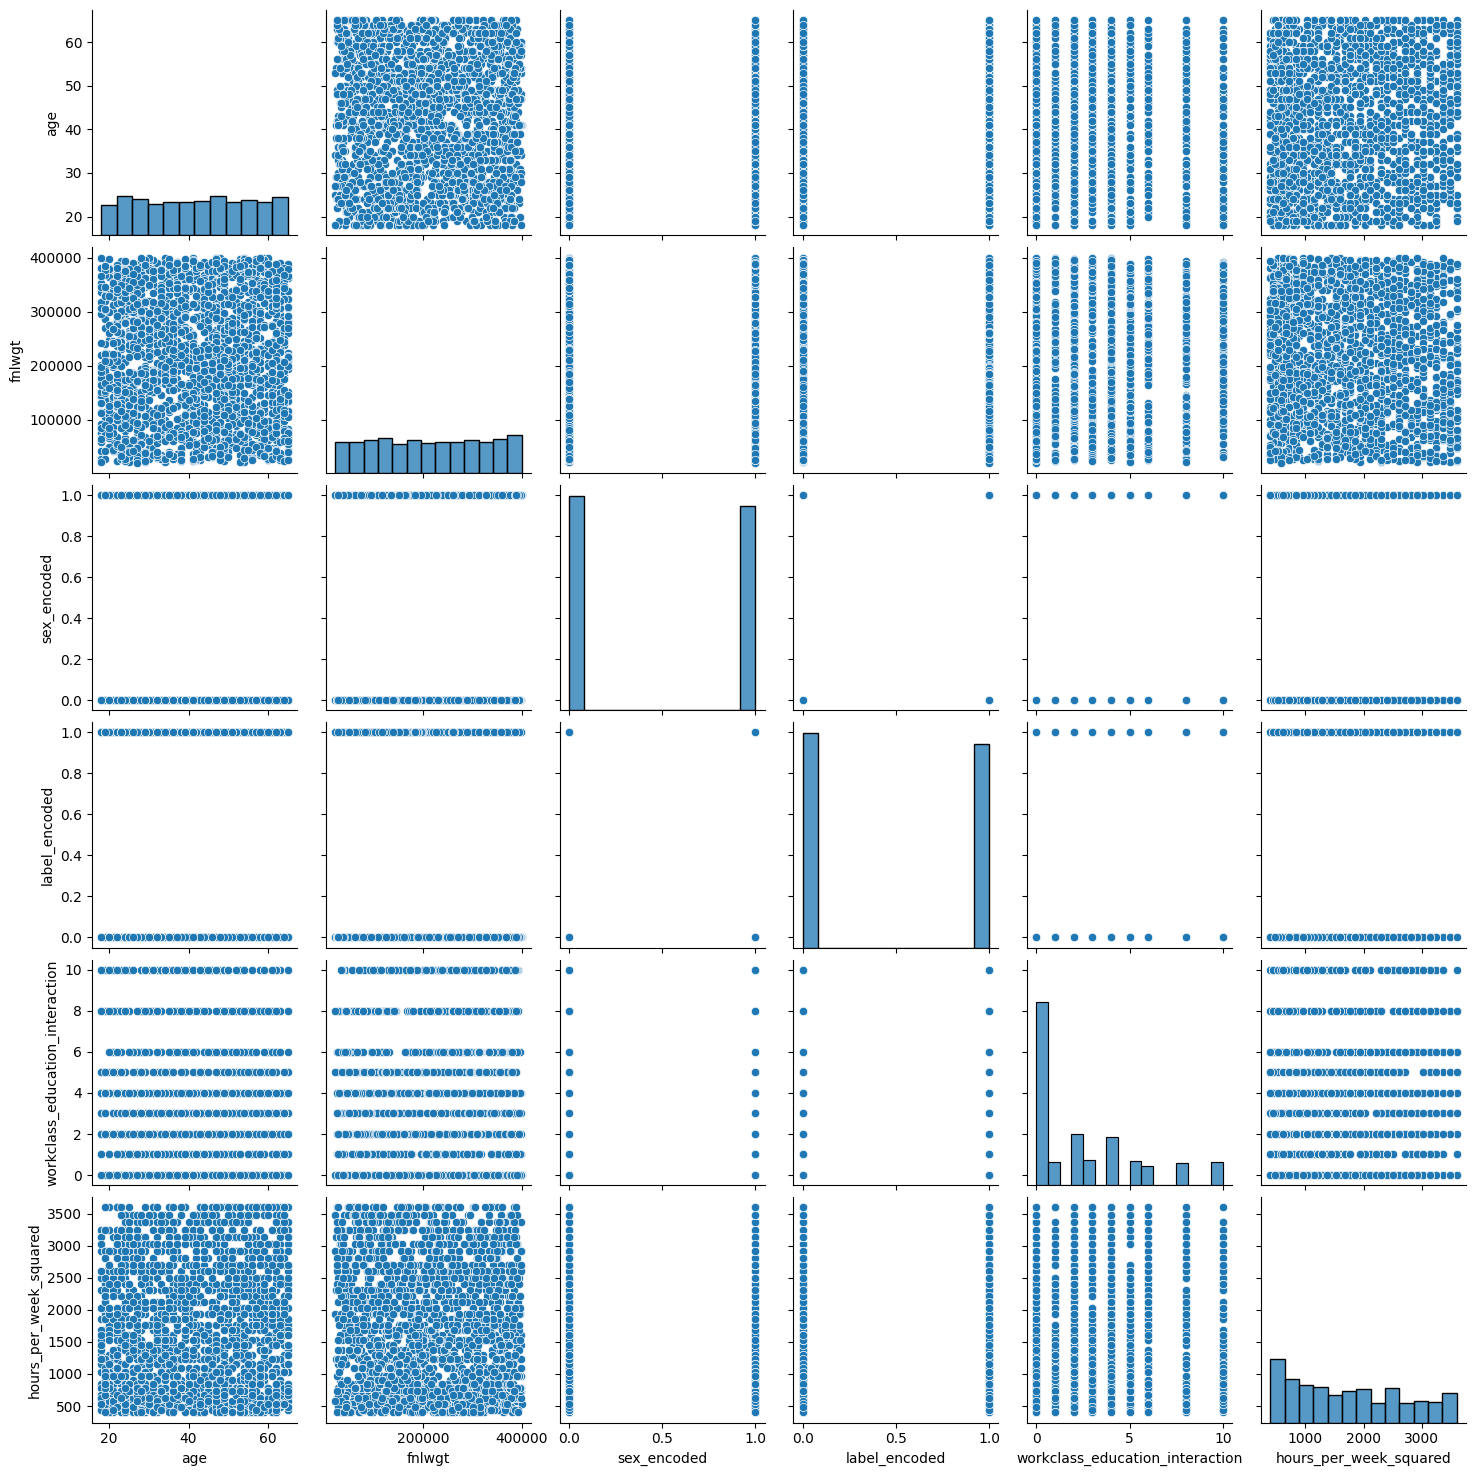

In [8]:
# Pairplot to visualize interactions between all features
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

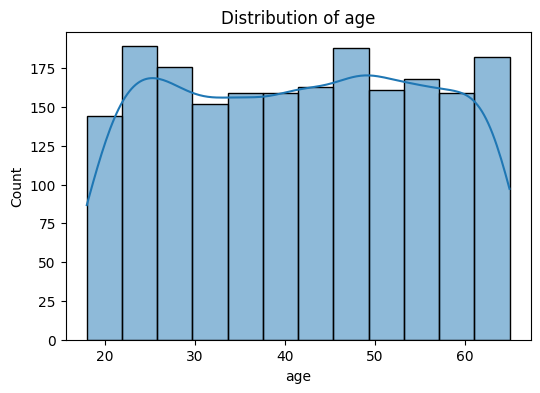

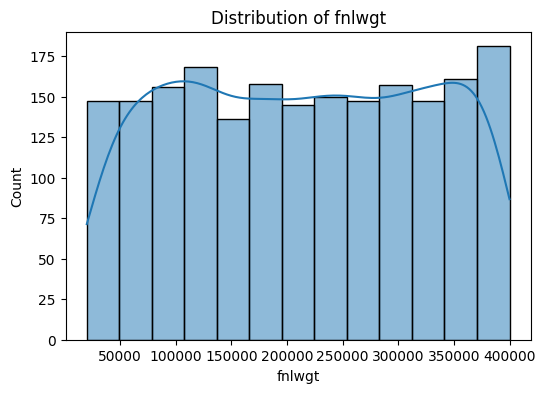

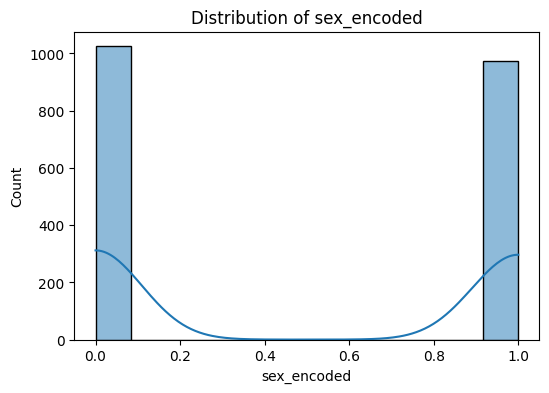

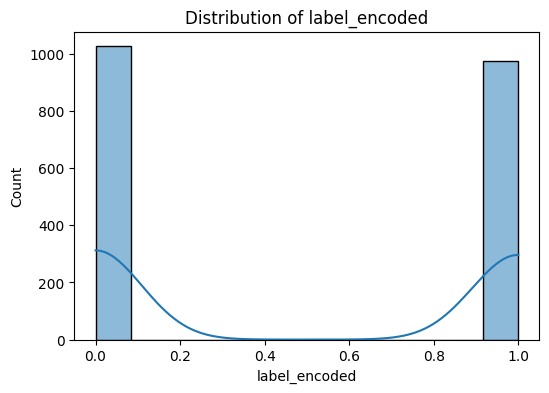

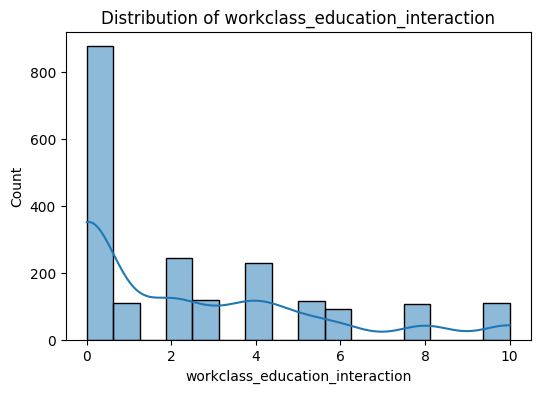

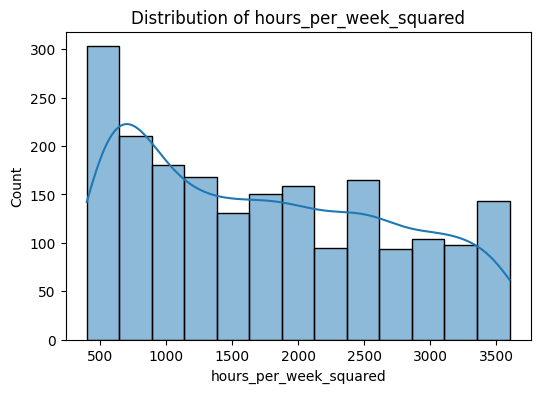

In [9]:
# Visualize distributions of all features
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [24]:
# Split the dataset: 10% test, 90% rest; then 20% train, 80% validation from the rest
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label_encoded', 'fnlwgt'])  # features
y = df['label_encoded']  # target
weights = df['fnlwgt']   # sample weights

# First split: 10% test, 90% rest
X_rest, X_test, y_rest, y_test, weights_rest, weights_test = train_test_split(
    X, y, weights, test_size=0.10, random_state=42
 )

# Second split: 20% train, 80% validation from the remaining 90%
X_train, X_val, y_train, y_val, weights_train, weights_val = train_test_split(
    X_rest, y_rest, weights_rest, test_size=0.65, random_state=42
 )

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

Train shape: (630, 4), Validation shape: (1170, 4), Test shape: (200, 4)


In [25]:
# GridSearchCV for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.utils import resample


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None]
}
logreg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)
print('Best cross-validated accuracy:', grid_search.best_score_)

/home/osgomez/Code/icesi_codes/8vo_semestre/distribuidos/classificationWithSparkML/venv/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/osgomez/Code/icesi_codes/8vo_semestre/distribuidos/classificationWithSparkML/venv/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/osgomez/Code/icesi_codes/8vo_semestre/distribuidos/classificationWithSparkML/venv/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/osgomez/Code/icesi_codes/8vo_semestre/distribuidos/classificationWithSparkML/venv/lib64/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
 

Best parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated accuracy: 0.5253968253968253


In [26]:
# Cross-validation for logistic regression with best parameters
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(
    LogisticRegression(class_weight=None, solver="liblinear", C=10, penalty='l2'),
    X_train, y_train, cv=cv, scoring='accuracy'
 )
print(f"Cross-validation accuracy scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")

Cross-validation accuracy scores: [0.46031746 0.55555556 0.49206349 0.57142857 0.47619048 0.57142857
 0.52380952 0.57142857 0.44444444 0.44444444]
Mean CV accuracy: 0.5111


In [27]:
# Cross-validation for SVM
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"SVM Cross-validation accuracy scores: {svm_scores}")
print(f"SVM Mean CV accuracy: {svm_scores.mean():.4f}")

SVM Cross-validation accuracy scores: [0.3968254  0.42857143 0.47619048 0.41269841 0.44444444 0.47619048
 0.47619048 0.50793651 0.50793651 0.57142857]
SVM Mean CV accuracy: 0.4698


In [29]:
# Bootstrapping accuracy estimation for SVM and Logistic Regression
n_bootstraps = 100
svm_accuracies = []
logreg_accuracies = []
best_logreg_score = -1
best_logreg_model = None
for i in range(n_bootstraps):
    X_bs, y_bs = resample(X_val, y_val, random_state=42+i)
    # SVM
    svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
    svm_model.fit(X_bs, y_bs)
    y_pred_svm = svm_model.predict(X_test)
    svm_accuracies.append(accuracy_score(y_test, y_pred_svm))
    # Logistic Regression
    logreg_model = LogisticRegression(class_weight='balanced', solver="liblinear", random_state=42)
    logreg_model.fit(X_bs, y_bs)
    y_pred_logreg = logreg_model.predict(X_test)
    score = accuracy_score(y_test, y_pred_logreg)
    logreg_accuracies.append(score)
    if score > best_logreg_score:
        best_logreg_score = score
        best_logreg_model = logreg_model

print(f"SVM Bootstrapped Accuracy: Mean={np.mean(svm_accuracies):.4f}, Std={np.std(svm_accuracies):.4f}")
print(f"Logistic Regression Bootstrapped Accuracy: Mean={np.mean(logreg_accuracies):.4f}, Std={np.std(logreg_accuracies):.4f}")

# The best logistic regression model from bootstrapping
model = best_logreg_model

SVM Bootstrapped Accuracy: Mean=0.4777, Std=0.0288
Logistic Regression Bootstrapped Accuracy: Mean=0.4840, Std=0.0267


In [34]:
# 1. Data created by hand
new_rows = [
    {'age': 22, 'sex': 'Male', 'workclass': 'Private', 'fnlwgt': 123456, 'education': 'Bachelors', 'hours_per_week': 40, 'label': '>50K'},
    {'age': 45, 'sex': 'Female', 'workclass': 'Gov', 'fnlwgt': 234567, 'education': 'HS-grad', 'hours_per_week': 35, 'label': '>50K'},
    {'age': 32, 'sex': 'Male', 'workclass': 'Self-emp', 'fnlwgt': 345678, 'education': 'Masters', 'hours_per_week': 50, 'label': '>50K'},
    {'age': 28, 'sex': 'Female', 'workclass': 'Private', 'fnlwgt': 456789, 'education': 'Assoc', 'hours_per_week': 20, 'label': '<=50K'},
    {'age': 60, 'sex': 'Male', 'workclass': 'Gov', 'fnlwgt': 567890, 'education': 'HS-grad', 'hours_per_week': 45, 'label': '>50K'},
    {'age': 22, 'sex': 'Female', 'workclass': 'Self-emp', 'fnlwgt': 678901, 'education': 'Some-college', 'hours_per_week': 30, 'label': '<=50K'},
    {'age': 35, 'sex': 'Male', 'workclass': 'Private', 'fnlwgt': 789012, 'education': 'Bachelors', 'hours_per_week': 60, 'label': '>50K'},
    {'age': 41, 'sex': 'Female', 'workclass': 'Gov', 'fnlwgt': 890123, 'education': 'Masters', 'hours_per_week': 38, 'label': '>50K'},
    {'age': 55, 'sex': 'Male', 'workclass': 'Self-emp', 'fnlwgt': 901234, 'education': 'HS-grad', 'hours_per_week': 25, 'label': '<=50K'}
]
new_df = pd.DataFrame(new_rows)

# Following the same encoding as before
new_df['sex_encoded'] = new_df['sex'].map({'Male': 1, 'Female': 0})
new_df['workclass_encoded'] = new_df['workclass'].map({'Private': 1, 'Gov': 0, 'Self-emp': 2})
new_df['label_encoded'] = new_df['label'].map({'<=50K': 0, '>50K': 1})
new_df['education_encoded'] = new_df['education'].map({
    '11th': 0,
    'HS-grad': 1,
    'Some-college': 2,
    'Assoc': 3,
    'Bachelors': 4,
    'Masters': 5
})
new_df['workclass_education_interaction'] = new_df['workclass_encoded'] * new_df['education_encoded']
new_df['hours_per_week_squared'] = new_df['hours_per_week'] ** 2

# 3. Select the same features as used for training (drop 'fnlwgt')
features = [
    'age', 'sex_encoded', 'workclass_education_interaction',
    'hours_per_week_squared'
]
X_new = new_df[features]

# 4. Validate with the trained model
y_pred = model.predict(X_new)

# 5. Comparative table: real vs predicted
comparative = pd.DataFrame({
    'real_label': new_df['label'],
    'predicted_label': ['>50K' if p == 1 else '<=50K' for p in y_pred]
})
print(comparative)

  real_label predicted_label
0       >50K            >50K
1       >50K           <=50K
2       >50K            >50K
3      <=50K           <=50K
4       >50K            >50K
5      <=50K           <=50K
6       >50K            >50K
7       >50K           <=50K
8      <=50K           <=50K
